<a href="https://colab.research.google.com/github/KyleRoss-rice/SignIconicityPredictor/blob/main/tools/dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preparation
Process the ASL-Lex 2.0 dataset into an appropriate dataset for regression and classification tasks. 

The regression target feature is **Non-Signer Iconicity**. 
The classification target feature is **Iconicity Type**.

This script generates training and testing _.csv_ files for both tasks.

## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import sklearn
import csv

from google.colab import files
from sklearn import feature_extraction
from sklearn import model_selection 

## Fetch original ASL-LEX 2.0 dataset from our GitHub repository

In [ ]:
!wget -O asl-lex2.csv https://raw.githubusercontent.com/KyleRoss-rice/SignIconicityPredictor/main/data/ASL-LEX2_Oct21_2020.csv

--2020-11-18 16:41:20--  https://raw.githubusercontent.com/KyleRoss-rice/SignIconicityPredictor/main/data/ASL-LEX2_Oct21_2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3480805 (3.3M) [text/plain]
Saving to: ‘asl-lex2.csv’

asl-lex2.csv        100%[===================>]   3.32M  --.-KB/s    in 0.1s    

2020-11-18 16:41:20 (25.8 MB/s) - ‘asl-lex2.csv’ saved [3480805/3480805]



## Create pandas object from the source dataset

In [ ]:
source_data = pd.read_csv('asl-lex2.csv')
working_data = source_data.copy()

n_rows = len(source_data)
n_columns = len(source_data.columns)

# downcast all numeric 64 bit types to 32 bits
# TODO: there must be a vectorized way of doing this...
new_types={}
for c in [i for i, t in enumerate(working_data.dtypes) if t == 'float64']:
  new_types[working_data.columns[c]]='float32'

for c in [i for i, t in enumerate(working_data.dtypes) if t == 'int64']:
  new_types[working_data.columns[c]]='int32'

working_data = working_data.astype(new_types)

In [ ]:
pd.options.display.max_columns = None
working_data

,Entry ID,Lemma ID,Batch,List,Item,English Word Frequency,Frequency,Frequency SD,Frequency Z,Frequency N,Frequency (Native),Frequency Sd (Native),Frequency Z (Native),Frequency N (Native),Frequency (Nonnative),Frequency SD (Nonnative),Frequency N (Nonnative),Frequency Z (Nonnative),Dominant English Translation,Sign Unknown (%),English Translation Agreement (%),Unknown To Participant (%) (Native),English Name Agreement (%) (Native),Unknown To Participant (%) (Nonnative),English Name Agreement (%) (Nonnative),Non-Signer Iconicity,Non-Signer Iconicity SD,Non-Signer Iconicity Z,Non-Signer Iconicity N,Non-Signer Iconicity SD.1,Iconicity Type,Deaf Signer Iconicity,Deaf Signer Iconicity SD (Native),Deaf Signer Iconicity N,Deaf Signer Iconicity Z,Deaf Signer Iconicity (Native),Deaf Signer Iconicity SD (Native).1,Deaf Signer Iconicity Z (Native),Deaf Signer Iconicity N (Native),English Translation Agreement,Guess accuracy,Transparency,Transparency SD,Transparency Z,Lexical Class,Sign Onset (ms),Sign Offset (ms),Duration (ms),Video Length (ms),In CDI,CDI Semantic Category,Initialized Sign,Fingerspelled Loan Sign,Compound,Number Of Morphemes,Handshape,Selected Fingers,Flexion,Flexion Change,Spread Change,Thumb Position,Thumb Contact,Sign Type,Path Movement,Repeated Movement,Major Location,Minor Location,Second Minor Location,Contact,Nondominant Handshape,Wrist Twist,Handshape M2,Selected Fingers M2,Flexion M2,Flexion Change M2,Spread M2,Spread Change M2,Thumb Position M2,Thumb Contact M2,Sign Type M2,Movement M2,Repeated Movement M2,Major Location M2,Minor Location M2,Second Minor Location M2,Contact M2,Nondominant Handshape M2,Wrist Twist M2,Handshape M3,Selected Fingers M3,Flexion M3,Flexion Change M3,Spread M3,Spread Change M3,Thumb Position M3,Thumb Contact M3,Signtype M3,Movement M3,Repeated Movement M3,Major Location M3,Minor Location M3,Second Minor Location M3,Contact M3,Nondominant Handshape M3,Wrist Twist M3,Handshape M4,Selected Fingers M4,Flexion M4,Flexion Change M4,Spread M4,Spread Change M4,Thumb Position M4,Thumb Contact M4,Sign Type M4,Movement M4,Repeated Movement M4,Major Location M4,Minor Location M4,Second Minor Location M4,Contact M4,Nondominant Handshape M4,Wrist Twist M4,Handshape M5,Selected Fingers M5,Flexion M5,Flexion Change M5,Spread M5,Spread Change M5,Thumb Position M5,Thumb Contact M5,Signtype M5,Movement M5,Repeated Movement M5,Major Location M5,Minor Location M5,Second Minor Location M5,Contact M5,Nondominant Handshape M5,Wrist Twist M5,Handshape M6,Selected Fingers M6,Flexion M6,Flexion Change M6,Spread M6,Spread Change M6,Thumb Position M6,Thumb Contact M6,Sign Type M6,Movement M6,Repeated Movement M6,Major Location M6,Minor Location M6,Second Minor Location M6,Contact M6,Nondominant Handshape M6,Wrist Twist M6,Sign Type Frequency,Major Location Frequency,Minor Location Frequency,Second Minor Location Frequency,Movement Frequency,Selected Fingers Frequency,Flexion Frequency,Flexion Change Frequency,Repeated Movement Frequency,Contact Frequency,Spread Frequency,Spread Change Frequency,Thumb Contact Frequency,Thumb Position Frequency,Ulnar Rotatio Nfrequency,Phonotactic Probability,Parameter Neighborhood Density,Neighborhood Density,SignBank Reference ID,Age Of Acquisition,Age Of Acquisition (Empirical)
0,1_dollar,1_dollar,C,2.0,25.0,NaN,3.034,1.500,-0.728,29,2.944,1.474,-0.843,18,3.182,1.601,12,-0.541,NaN,NaN,NaN,NaN,NaN,0.083,NaN,1.074,0.267,-0.820,27.0,NaN,Arbitrary,2.10,1.45,30.0,-0.42,2.29,1.49,-0.37,21.0,NaN,NaN,NaN,NaN,NaN,Noun,467,1101,634,1668,No,NaN,NaN,NaN,NaN,1,c,imrp,Curved,1.0,NaN,Open,NaN,Asymmetrical Different Handshape,Straight,1.0,Hand,Finger Back,Hand Away,1.0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Correct typos

In [ ]:
working_data.rename(columns={'Ulnar Rotatio Nfrequenecy': 'Ulnar Rotation Frequency'}, inplace=True);
working_data.rename(columns={'Frequency Sd (Native)': 'Frequency SD (Native)'}, inplace=True);

working_data

,Entry ID,Lemma ID,Batch,List,Item,English Word Frequency,Frequency,Frequency SD,Frequency Z,Frequency N,Frequency (Native),Frequency SD (Native),Frequency Z (Native),Frequency N (Native),Frequency (Nonnative),Frequency SD (Nonnative),Frequency N (Nonnative),Frequency Z (Nonnative),Dominant English Translation,Sign Unknown (%),English Translation Agreement (%),Unknown To Participant (%) (Native),English Name Agreement (%) (Native),Unknown To Participant (%) (Nonnative),English Name Agreement (%) (Nonnative),Non-Signer Iconicity,Non-Signer Iconicity SD,Non-Signer Iconicity Z,Non-Signer Iconicity N,Non-Signer Iconicity SD.1,Iconicity Type,Deaf Signer Iconicity,Deaf Signer Iconicity SD (Native),Deaf Signer Iconicity N,Deaf Signer Iconicity Z,Deaf Signer Iconicity (Native),Deaf Signer Iconicity SD (Native).1,Deaf Signer Iconicity Z (Native),Deaf Signer Iconicity N (Native),English Translation Agreement,Guess accuracy,Transparency,Transparency SD,Transparency Z,Lexical Class,Sign Onset (ms),Sign Offset (ms),Duration (ms),Video Length (ms),In CDI,CDI Semantic Category,Initialized Sign,Fingerspelled Loan Sign,Compound,Number Of Morphemes,Handshape,Selected Fingers,Flexion,Flexion Change,Spread Change,Thumb Position,Thumb Contact,Sign Type,Path Movement,Repeated Movement,Major Location,Minor Location,Second Minor Location,Contact,Nondominant Handshape,Wrist Twist,Handshape M2,Selected Fingers M2,Flexion M2,Flexion Change M2,Spread M2,Spread Change M2,Thumb Position M2,Thumb Contact M2,Sign Type M2,Movement M2,Repeated Movement M2,Major Location M2,Minor Location M2,Second Minor Location M2,Contact M2,Nondominant Handshape M2,Wrist Twist M2,Handshape M3,Selected Fingers M3,Flexion M3,Flexion Change M3,Spread M3,Spread Change M3,Thumb Position M3,Thumb Contact M3,Signtype M3,Movement M3,Repeated Movement M3,Major Location M3,Minor Location M3,Second Minor Location M3,Contact M3,Nondominant Handshape M3,Wrist Twist M3,Handshape M4,Selected Fingers M4,Flexion M4,Flexion Change M4,Spread M4,Spread Change M4,Thumb Position M4,Thumb Contact M4,Sign Type M4,Movement M4,Repeated Movement M4,Major Location M4,Minor Location M4,Second Minor Location M4,Contact M4,Nondominant Handshape M4,Wrist Twist M4,Handshape M5,Selected Fingers M5,Flexion M5,Flexion Change M5,Spread M5,Spread Change M5,Thumb Position M5,Thumb Contact M5,Signtype M5,Movement M5,Repeated Movement M5,Major Location M5,Minor Location M5,Second Minor Location M5,Contact M5,Nondominant Handshape M5,Wrist Twist M5,Handshape M6,Selected Fingers M6,Flexion M6,Flexion Change M6,Spread M6,Spread Change M6,Thumb Position M6,Thumb Contact M6,Sign Type M6,Movement M6,Repeated Movement M6,Major Location M6,Minor Location M6,Second Minor Location M6,Contact M6,Nondominant Handshape M6,Wrist Twist M6,Sign Type Frequency,Major Location Frequency,Minor Location Frequency,Second Minor Location Frequency,Movement Frequency,Selected Fingers Frequency,Flexion Frequency,Flexion Change Frequency,Repeated Movement Frequency,Contact Frequency,Spread Frequency,Spread Change Frequency,Thumb Contact Frequency,Thumb Position Frequency,Ulnar Rotatio Nfrequency,Phonotactic Probability,Parameter Neighborhood Density,Neighborhood Density,SignBank Reference ID,Age Of Acquisition,Age Of Acquisition (Empirical)
0,1_dollar,1_dollar,C,2.0,25.0,NaN,3.034,1.500,-0.728,29,2.944,1.474,-0.843,18,3.182,1.601,12,-0.541,NaN,NaN,NaN,NaN,NaN,0.083,NaN,1.074,0.267,-0.820,27.0,NaN,Arbitrary,2.10,1.45,30.0,-0.42,2.29,1.49,-0.37,21.0,NaN,NaN,NaN,NaN,NaN,Noun,467,1101,634,1668,No,NaN,NaN,NaN,NaN,1,c,imrp,Curved,1.0,NaN,Open,NaN,Asymmetrical Different Handshape,Straight,1.0,Hand,Finger Back,Hand Away,1.0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Feature selection

#### Remove handpicked features that are unrelated to phonological properties or that are evidently highly coviarate

In [ ]:
sampling_metadata_features = ['Entry ID', 'Lemma ID', 'Batch', 'List', 'Item', 'In CDI']
video_metadata_features = ['Sign Onset (ms)', 'Sign Offset (ms)', 'Duration (ms)', 'Video Length (ms)']
lexical_features = [
    'English Word Frequency', 'Lexical Class',
    'Frequency', 'Frequency SD', 'Frequency N', 'Frequency Z',
    'Frequency (Nonnative)', 'Frequency SD (Nonnative)', 'Frequency N (Nonnative)', 'Frequency Z (Nonnative)',
    'Frequency (Native)', 'Frequency SD (Native)', 'Frequency N (Native)', 'Frequency Z (Native)'
]

covariate_features = ['Non-Signer Iconicity N', 'Non-Signer Iconicity Z'] #keep non-signer iconicity mean

features_to_trim = sampling_metadata_features + video_metadata_features + lexical_features + covariate_features

del sampling_metadata_features
del video_metadata_features
del lexical_features
del covariate_features

In [ ]:
working_data.drop(features_to_trim, 1, inplace=True)
n_trimmed = len(features_to_trim)

print(f'Original dataset contains {n_columns} columns')
n_columns -= n_trimmed
print(f'{n_trimmed} columns were trimmed. {n_columns} columns remain')

Original dataset contains 177 columns
26 columns were trimmed. 151 columns remain


#### Keep features and entries that are at least 80% non-NA


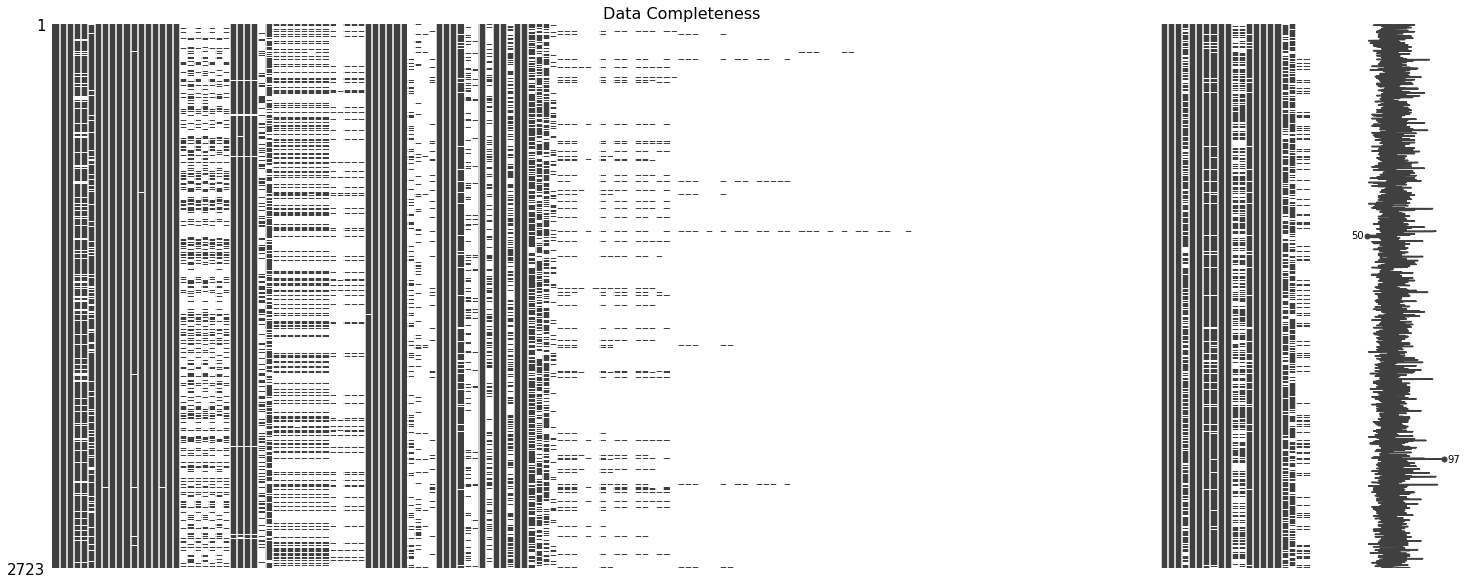

In [ ]:
msno.matrix(source_data, fontsize=12)
plt.title('Data Completeness', fontsize=16);

In [ ]:
#Save iconicity type feature
is_iconicity_type_dropped = False
iconicity_type_data = working_data['Iconicity Type'].values

#Drop features
working_data.dropna(1, thresh=n_rows * .8, inplace=True)

#Append back iconicity type, if required
if ('Iconicity Type' not in working_data.columns):
  is_iconicity_type_dropped = True
  working_data['Iconicity Type'] = iconicity_type_data

n_trimmed = n_columns - len(working_data.columns)
n_columns -= n_trimmed
print(f'{n_trimmed} columns were trimmed. {n_columns} columns remain')

125 columns were trimmed. 26 columns remain


In [ ]:
#Drop entries
working_data.dropna(0, thresh=n_columns * .8, inplace=True)

n_trimmed = n_rows - len(working_data)
print(f'{n_trimmed} rows were trimmed. {n_rows - n_trimmed} rows remain')

0 rows were trimmed. 2723 rows remain


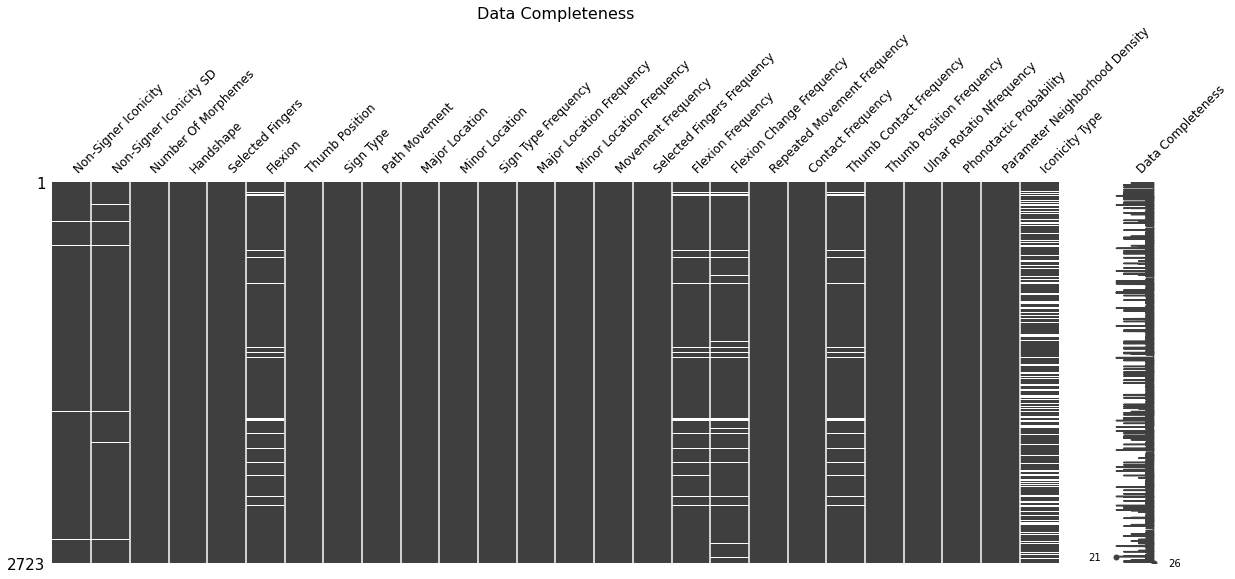

In [ ]:
msno.matrix(working_data, labels=True, figsize=(20, 7), fontsize=12)
plt.title('Data Completeness', fontsize=16);

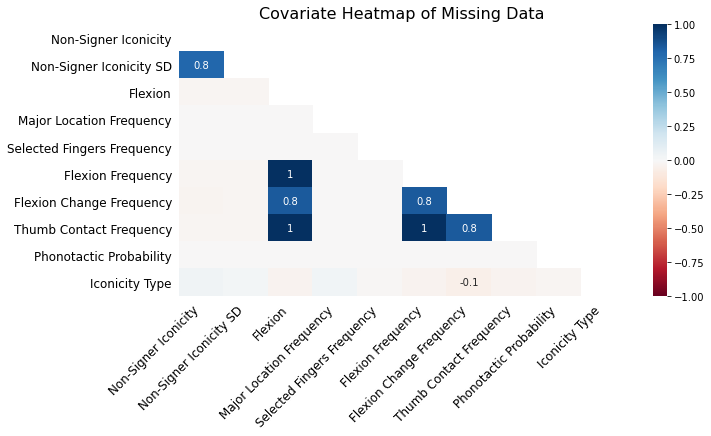

In [ ]:
msno.heatmap(working_data, figsize=(10,5), fontsize=12)
plt.title('Covariate Heatmap of Missing Data', fontsize=16);

#### Drop all entries containing a NA (except for Iconicity Type)


In [ ]:
#Do not drop iconicity type feature
if (is_iconicity_type_dropped):
  working_data.dropna(0, inplace=True, subset=working_data.columns[:-1])
else:
  working_data.dropna(0, inplace=True)

ndropped_rows = n_rows - len(working_data) 
print(f'{ndropped_rows} rows were dropped')
n_rows -= ndropped_rows

235 rows were dropped


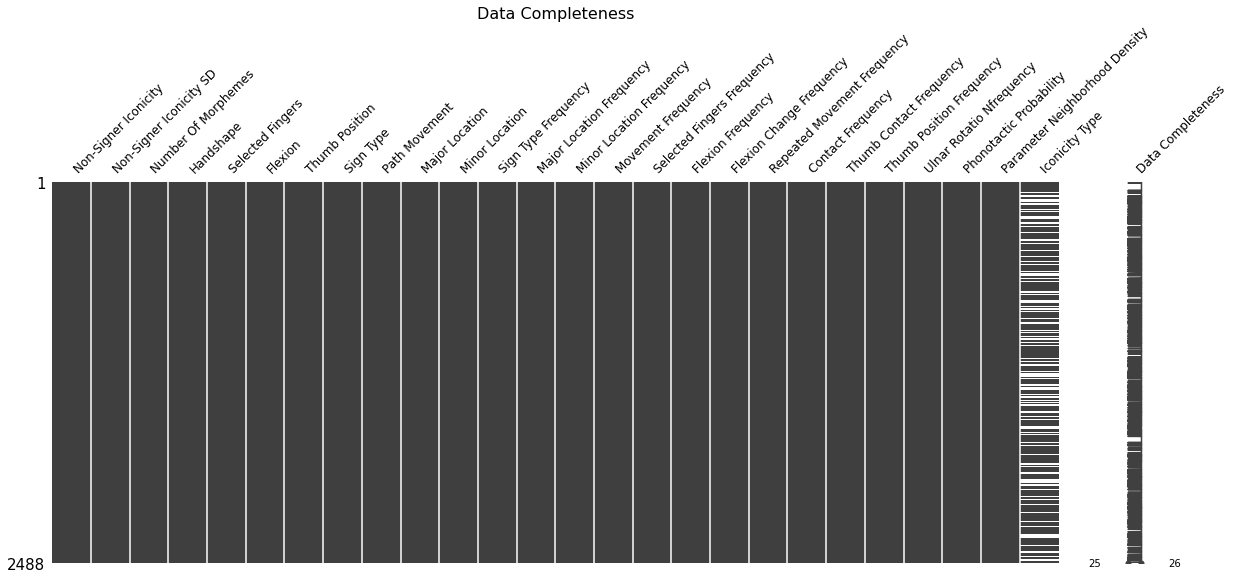

In [ ]:
msno.matrix(working_data, labels=True, figsize=(20,7), fontsize=12)
plt.title('Data Completeness', fontsize=16);

## Save the indices of the remaining entries for cross referencing

In [ ]:
remaining_entries_indices = working_data.index.to_list()
working_data.reset_index(drop=True, inplace=True)
working_data.insert(0, 'ASL-Lex 2.0 ID', remaining_entries_indices)
working_data.astype({'ASL-Lex 2.0 ID': 'int32'})

,ASL-Lex 2.0 ID,Non-Signer Iconicity,Non-Signer Iconicity SD,Number Of Morphemes,Handshape,Selected Fingers,Flexion,Thumb Position,Sign Type,Path Movement,Major Location,Minor Location,Sign Type Frequency,Major Location Frequency,Minor Location Frequency,Movement Frequency,Selected Fingers Frequency,Flexion Frequency,Flexion Change Frequency,Repeated Movement Frequency,Contact Frequency,Thumb Contact Frequency,Thumb Position Frequency,Ulnar Rotatio Nfrequency,Phonotactic Probability,Parameter Neighborhood Density,Iconicity Type
0,0,1.074,0.267,1,c,imrp,Curved,Open,Asymmetrical Different Handshape,Straight,Hand,Finger Back,0.175,0.250,0.019,0.457,0.449,0.225,0.209,0.446,0.622,0.684,0.657,0.836,-0.020,383,Arbitrary
1,1,5.481,1.503,1,5,imrp,Fully Open,Open,One Handed,None,Neutral,Neutral,0.392,0.363,0.363,0.153,0.449,0.409,0.791,0.554,0.378,0.684,0.657,0.164,0.281,190,Perceptual
2,2,2.654,1.623,1,8,m,Curved,Open,Asymmetrical Different Handshape,Circular,Hand,Finger Front,0.175,0.250,0.015,0.076,0.045,0.225,0.791,0.554,0.622,0.316,0.657,0.836,-0.396,129,Arbitrary
3,3,2.741,1.430,2,flat_1,i,Flat,Closed,One Handed,Straight,Arm,Wrist Back,0.392,0.026,0.004,0.457,0.261,0.162,0.791,0.554,0.622,0.684,0.343,0.836,-0.252,48,Arbitrary
4,4,3.769,1.925,1,flat_b,imrp,Flat,Open,Symmetrical Or Alternating,Curved,Head,Head Away,0.345,0.266,0.066,0.233,0.449,0.162,0.791,0.554,0.378,0.684,0.657,0.164,0.089,158,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2717,2.813,1.554,1,flat_4,imrp,Flat,Closed,Symmetrical Or Alternating,Straight,Body,Torso Top,0.345,0.094,0.032,0.457,0.449,0.162,0.791,0.446,0.622,0.684,0.343,0.836,-0.032,115,Arbitrary
2484,2718,6.565,1.161,1,o,imrp,Curved,Open,One Handed,Straight,Neutral,Neutral,0.392,0.363,0.363,0.457,0.449,0.225,0.791,0.554,0.378,0.316,0.657,0.836,0.596,482,Perceptual
2485,2719,6.394,1.029,1,baby_o,i,Bent,Open,Dominance Violation,Straight,Body,Waist,0.023,0.094,0.002,0.457,0.261,0.099,0.791,0.446,0.378,0.316,0.657,0.836,-0.694,165,Pantomimic
2486,2721,4.667,2.187,1,s,i,Fully Closed,Open,Symmetrical Or Alternating,Straight,Neutral,Neutral,0.345,0.363,0.363,0.457,0.261,0.067,0.209,0.554,0.622,0.316,0.657,0.836,0.129,524,NaN


## Encode nominal data

### One-Hot and 4-bit Feature Hashing Encoding

In [ ]:
def encode_one_hot(df, features_to_encode): 
  n_features = len(features_to_encode)
  new_features = None
  for i in range(n_features):
    current_feature_data = df[features_to_encode[i]]
    new_features = pd.concat((new_features, pd.get_dummies(current_feature_data)), axis=1)
  return new_features

def encode_feature_hasher(df, features_to_encode, n_bits):
  n_features = len(features_to_encode)
  new_features = np.empty((len(df), n_features * n_bits))
  feature_hasher = sklearn.feature_extraction.FeatureHasher(n_features=n_bits, input_type='string')
  for i in range(n_features):
    current_feature_data = np.array(feature_hasher.fit_transform(df[features_to_encode[i]]).toarray())
    start_pos = n_bits * i
    new_features[:, start_pos: start_pos + n_bits] = current_feature_data
  
  new_features = pd.DataFrame(new_features)
  return new_features

In [ ]:
nominal_features = ('Selected Fingers', 'Major Location', 'Minor Location',
                    'Sign Type', 'Handshape', 'Flexion', 'Path Movement')

is_ohe = (True, True, True, True, True, True, True)

one_hot_features = [nominal_features[i] for i, on in enumerate(is_ohe) if on]
feature_hash_features = [i for i in nominal_features if i not in one_hot_features]

new_features = encode_one_hot(working_data, one_hot_features)
new_features = pd.concat((new_features, encode_feature_hasher(working_data, feature_hash_features, 4)), axis=1)
working_data.drop(one_hot_features, axis=1, inplace=True)
working_data.drop(feature_hash_features, axis=1, inplace=True)
working_data = pd.concat((working_data, new_features), axis=1)

### Label Encoding

In [ ]:
label_encoder = sklearn.preprocessing.LabelEncoder()

features_to_le = ['Thumb Position', 'Iconicity Type']
mappings = []

for f in features_to_le:
  working_data[f] = working_data[f].fillna('missing')
  working_data[f] = label_encoder.fit_transform(working_data[f])
  mappings.append({f:dict(zip(
      label_encoder.transform(label_encoder.classes_), 
      label_encoder.classes_
      ))})
mappings

[{'Thumb Position': {0: 'Closed', 1: 'Open'}},
 {'Iconicity Type': {0: 'Arbitrary',
   1: 'Both',
   2: 'Pantomimic',
   3: 'Perceptual',
   4: 'missing'}}]

In [ ]:
working_data

,ASL-Lex 2.0 ID,Non-Signer Iconicity,Non-Signer Iconicity SD,Number Of Morphemes,Thumb Position,Sign Type Frequency,Major Location Frequency,Minor Location Frequency,Movement Frequency,Selected Fingers Frequency,Flexion Frequency,Flexion Change Frequency,Repeated Movement Frequency,Contact Frequency,Thumb Contact Frequency,Thumb Position Frequency,Ulnar Rotatio Nfrequency,Phonotactic Probability,Parameter Neighborhood Density,Iconicity Type,i,im,imp,imr,imrp,ip,m,mr,mrp,p,Arm,Body,Hand,Head,Neutral,Arm Away,Body Away,Cheek Nose,Chin,Clavicle,Elbow Back,Eye,Finger Back,Finger Front,Finger Radial,Finger Tip,Finger Ulnar,Forearm Back,Forearm Front,Forearm Ulnar,Forehead,Hand Away,Head Away,Head Top,Heel,Hips,Mouth,Neck,Neutral,Other,Palm,Palm Back,Shoulder,Torso Bottom,Torso Mid,Torso Top,Under Chin,Upper Arm,Upper Lip,Waist,Wrist Back,Wrist Front,Asymmetrical Different Handshape,Asymmetrical Same Handshape,Dominance Violation,One Handed,Symmetrical Or Alternating,Symmetry Violation,1,3,4,5,8,a,baby_o,bent_1,bent_l,bent_v,c,closed_b,closed_e,curved_1,curved_4,curved_5,curved_h,curved_l,curved_v,d,e,f,flat_1,flat_4,flat_b,flat_h,flat_horns,flat_ily,flat_m,flat_n,flat_o,flat_v,flatspread_5,g,goody_goody,h,horns,i,ily,k,l,o,open_8,open_b,open_e,open_f,open_h,p,r,s,spread_e,spread_open_e,stacked_5,t,v,w,y,Bent,Crossed,Curved,Flat,Fully Closed,Fully Open,Stacked,Back And Forth,Circular,Curved,None,Other,Straight,X-shaped,Z-shaped
0,0,1.074,0.267,1,1,0.175,0.250,0.019,0.457,0.449,0.225,0.209,0.446,0.622,0.684,0.657,0.836,-0.020,383,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,5.481,1.503,1,1,0.392,0.363,0.363,0.153,0.449,0.409,0.791,0.554,0.378,0.684,0.657,0.164,0.281,190,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2,2.654,1.623,1,1,0.175,0.250,0.015,0.076,0.045,0.225,0.791,0.554,0.622,0.316,0.657,0.836,-0.396,129,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,3,2.741,1.430,2,0,0.392,0.026,0.004,0.457,0.261,0.162,0.791,0.554,0.622,0.684,0.343,0.836,-0.252,48,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,4,3.769,1.925,1,1,0.345,0.266,0.066,0.233,0.449,0.162,0.791,0.554,0.378,0.684,0.657,0.164,0.089,158,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2717,2.813,1.554,1,0,0.345,0.094,0.032,0.457,0.449,0.162,0.791,0.446,0.622,0.684,0.343,0.836,-0.032,115,0,0,0,0,0,1,0,0,0,0

## Create training and testing sets

In [ ]:
def create_data_files(data, filename_prefix):
  filename_suffixes = ('X_train', 'X_test', 'y_train', 'y_test')
  filename_extension = '.csv'

  for i, s in enumerate(data):
    s.to_csv(f'{filename_prefix}{filename_suffixes[i]}{filename_extension}', index=False)

In [ ]:
y_r = working_data.copy()[['Non-Signer Iconicity', 'Non-Signer Iconicity SD']]

In [ ]:

X_r = working_data.drop('Non-Signer Iconicity', axis=1).copy()
X_c = X_r.copy()
X_r.drop('Iconicity Type', axis=1, inplace=True)
y_c = X_c['Iconicity Type']
X_c.drop('Iconicity Type', axis=1, inplace=True)

splits = sklearn.model_selection.train_test_split(X_r, y_r, test_size=0.2)
create_data_files(splits, 'regression_')

splits = sklearn.model_selection.train_test_split(X_c, y_c, test_size=0.2)
create_data_files(splits, 'classification_')

## Zip and download sets

In [ ]:
!find -maxdepth 1 -iname 'regression*.csv' -print0 | xargs -0 zip regression_data.zip
files.download('regression_data.zip')

!find -maxdepth 1 -iname 'classification*.csv' -print0 | xargs -0 zip classification_data.zip
files.download('classification_data.zip')

  adding: regression_y_train.csv (deflated 62%)
  adding: regression_X_test.csv (deflated 91%)
  adding: regression_X_train.csv (deflated 92%)
  adding: regression_y_test.csv (deflated 60%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: classification_X_test.csv (deflated 92%)
  adding: classification_y_train.csv (deflated 82%)
  adding: classification_y_test.csv (deflated 78%)
  adding: classification_X_train.csv (deflated 92%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>